# Tree simulation 
The dataset trees.csv stores the occurence of a tree and its location, and other types of data from trees reported in allegheny county

In [5]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Polygon

trees = pd.read_csv("trees.csv")

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
maxNum = trees['neighborhood'].value_counts().max()

treeMetric = (trees['neighborhood'].value_counts()/maxNum)

#number of trees based on the neighborhood where it was found
display(trees['neighborhood'].value_counts())
print()
display(treeMetric)

Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2079
South Side Flats       1693
Shadyside              1558
                       ... 
Arlington Heights         5
Esplen                    3
South Shore               2
Glen Hazel                2
Hays                      1
Name: neighborhood, Length: 90, dtype: int64

Squirrel Hill South    1.000000
Highland Park          0.579736
Squirrel Hill North    0.409817
South Side Flats       0.333728
Shadyside              0.307116
                         ...   
Arlington Heights      0.000986
Esplen                 0.000591
South Shore            0.000394
Glen Hazel             0.000394
Hays                   0.000197
Name: neighborhood, Length: 90, dtype: float64

### What this metric represents

- The First metric represents the number of reported trees per neighborhood
- The second metric represent the number of tree based of a fraction of the maximum number of trees in any one location

This data suggests that by the standard of trees, Squirrel Hill South would be the best neighborhood

It is also possible that there are more reports of trees in one area as opposed to another and the metric is not a perfectly accurate representation

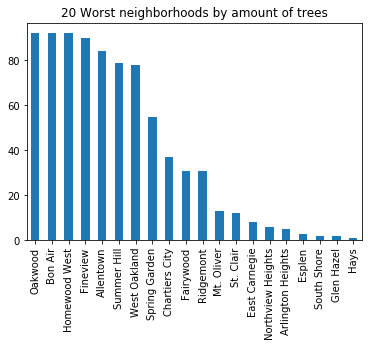

In [14]:
plt.title("20 Worst neighborhoods by amount of trees")
trees['neighborhood'].value_counts().tail(20).plot(kind="bar")

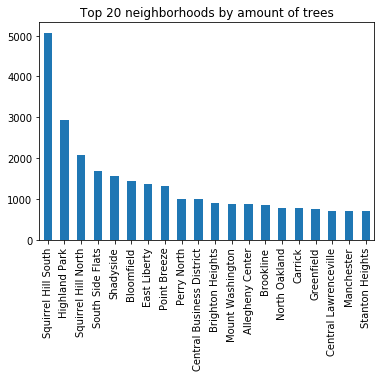

In [15]:
plt.title("Top 20 neighborhoods by amount of trees")
trees['neighborhood'].value_counts().head(20).plot(kind="bar")

- These two graph show the huge differences between the neighborhood's with many trees at the begining of the dataset and conversly, the ones at the end
    - Note that the 20th from last neiborhood "Homewood West" has only about 100 reported tree as opposed to more then 5000 for "Squirrel Hill South"

# Air Quality

# the air quality metric
the ari quality metric comes from a data set which anybody can contriubte to if they smell something, the location is then marked 

We ran into issues with this dataset given the dataset did not provide the neighborhood of the smell, However we were able to develop visualizations of the data that contriubte to our presentation and our metric

In [17]:
import pandas as pd
smellDf = pd.read_csv("smell_reports.csv")
smellDf.columns = smellDf.columns.str.replace(' ', '_')

In [20]:
symptomsAndDescription = smellDf[(smellDf.smell_description.notnull() & smellDf.symptoms.notnull())]
noSymptomsOrDescription = smellDf[(smellDf.smell_description.isnull() & smellDf.symptoms.isnull())]

##best of smelling group
smellVal1best = noSymptomsOrDescription.loc[noSymptomsOrDescription['smell_value'] == 1]

##worst smell of the worst smells
smellVal5worst = symptomsAndDescription.loc[symptomsAndDescription['smell_value'] == 5]

areSymptoms = smellDf[smellDf.symptoms.notnull()]
noSymptoms = smellDf[smellDf.symptoms.isnull()]

### slicing the dataset

- here I am isolating the best or most mild smells and the strongest smells based off if there was any symptoms or description of the smell then filtering them by "smell_value" 5 being the strongest and 1 being the most mild

In [21]:
def mapData(df,header):
    fp = "MapData/Allegheny_County_Municipal_Boundaries.shp"

    map_df = geopandas.read_file(fp)
    #display(map_df)
    #display(map_df)
    # check data type so we can see that this is not a normal dataframe, but a GEOdataframe
    # now let's preview what our map looks like with no data in it

        
    
    #print(map_df.loc[9:5])

    points = geopandas.points_from_xy(df.skewed_longitude, df.skewed_latitude)
    #display(points)
    

    gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.skewed_longitude, df.skewed_latitude))
    #print(gdf)

    # We restrict to South America.
    ax = map_df[map_df.NAME.notnull()].plot(color='white', edgecolor='black',figsize=(12,12))
    
    
    
    class AnyObject:
        pass
    class AnyObjectHandler:
        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            width, height = handlebox.width, handlebox.height
            patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',edgecolor='black', hatch='xx', lw=5,transform=handlebox.get_transform())
            handlebox.add_artist(patch)
            return patch
    
    plt.legend([AnyObject()], [header],handler_map={AnyObject: AnyObjectHandler()})
    
    
    gdf.plot(ax=ax,color="red")


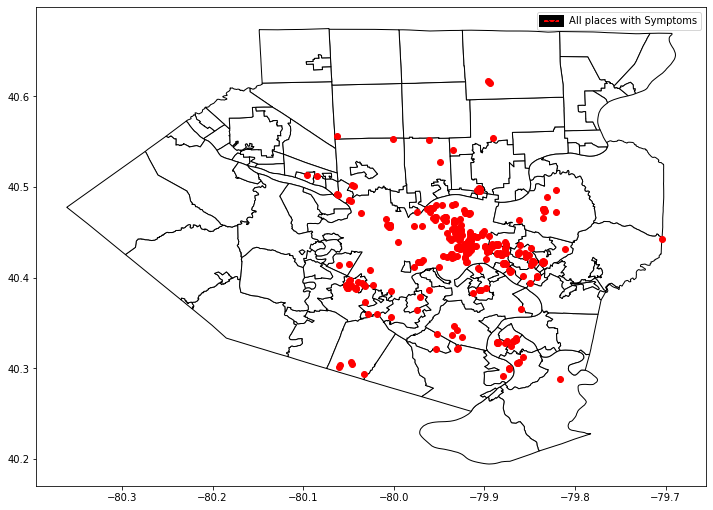

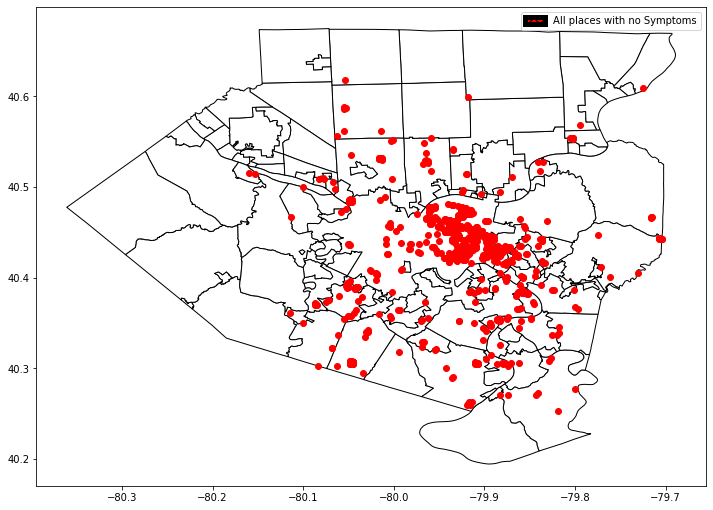

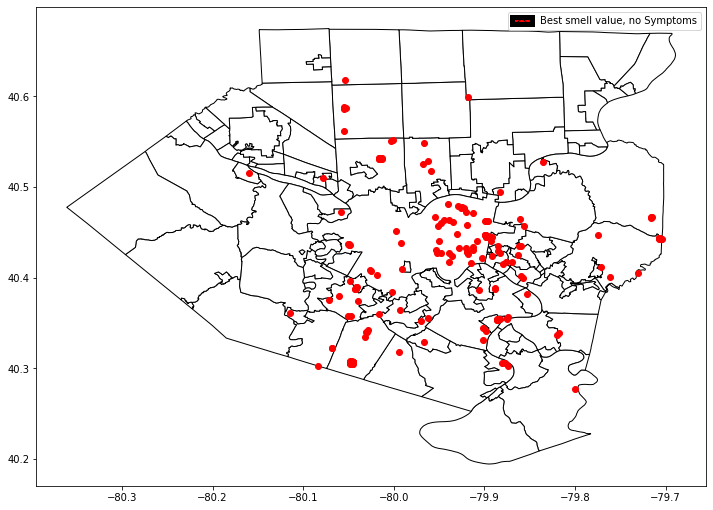

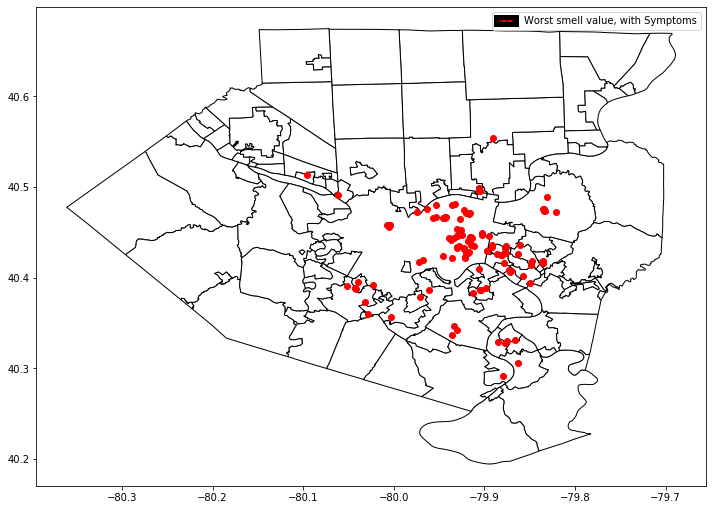

In [22]:
mapData(areSymptoms,"All places with Symptoms")
mapData(noSymptoms,"All places with no Symptoms")
mapData(smellVal1best,"Best smell value, no Symptoms")
mapData(smellVal5worst,"Worst smell value, with Symptoms")

# Maps
- These maps are an important metric, they show allegheny county and map the latitude and longitude of smell reports across the county 
- The results seem to be localized towards the center which tells me that there are probably more reports in general being made in this area
- The best smelling area is the area with the least amount of points because that means the area had no reports of smells at all

In [23]:
def barGraph(df,string):
    ob = df['zipcode'].value_counts()
    fig, ax = plt.subplots()
    
    plt.title(string)
    df['zipcode'].value_counts().plot(ax=ax, kind='bar',figsize = (12,5))

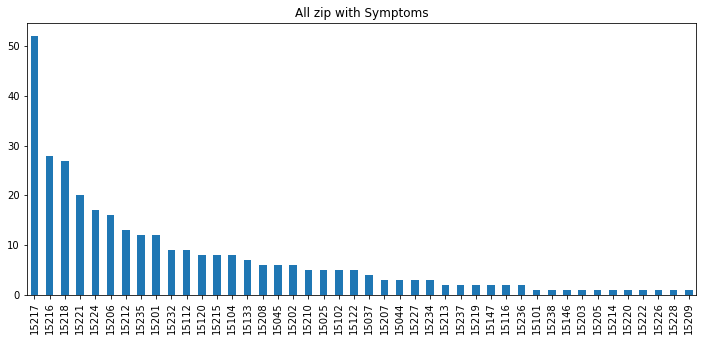

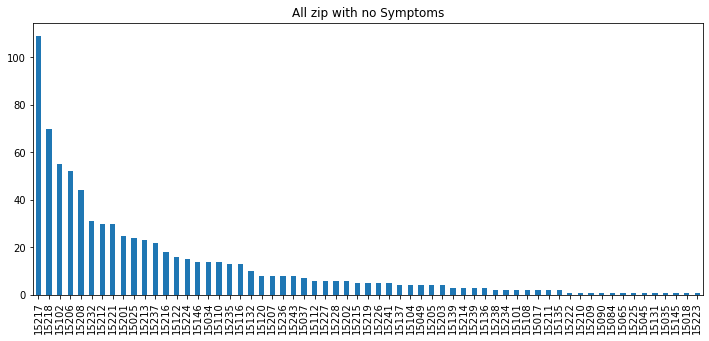

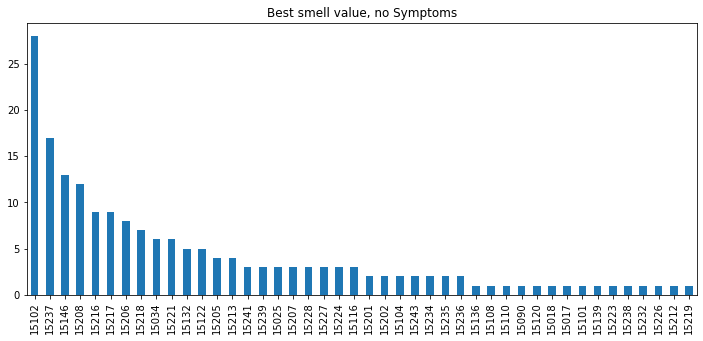

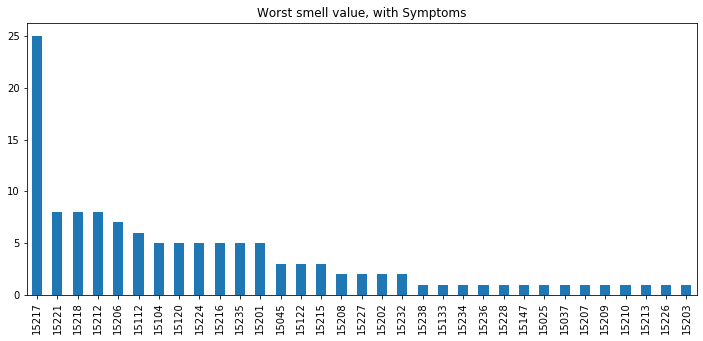

In [24]:
barGraph(areSymptoms,"Zipcodes with Symptoms")
barGraph(noSymptoms,"Zipcodes with no Symptoms")
barGraph(smellVal1best,"Best smell value, no Symptoms")
barGraph(smellVal5worst,"Worst smell value, with Symptoms")

### Bar graphs
 - These graps represent the metric of reports per zip code area.
 - The zip code 15217 which happens to be "Squirrel Hill South" seems to have the worst smell value overall
 - Again the data may not be entirly relyable 